In [1]:
%matplotlib inline

In [2]:
import numpy as np
import os
import pandas as pd
from sklearn.cluster import AgglomerativeClustering


#### Distance matrix used is RMSD

In [22]:
data_sdistance = pd.read_excel('mydata/data_sdistance_clean.xlsx',engine='openpyxl')


# data_sdistance[data_sdistance.filter(regex='^(?!Unnamed)').columns]

In [23]:
data_sdistance.shape


(577, 578)

In [24]:
set(list(data_sdistance.columns)) - set(list(data_sdistance['ID']))

{'ID'}

In [25]:
list(data_sdistance['ID'])


['17RA',
 '1A1T',
 '1A3M',
 '1A51',
 '1AFX',
 '1AJF',
 '1AJT',
 '1AL5',
 '1AM0',
 '1ATO',
 '1B36',
 '1BAU',
 '1BGZ',
 '1BN0',
 '1BVJ',
 '1C0A',
 '1C0O',
 '1D0T',
 '1D4R',
 '1DFU',
 '1DUH',
 '1DZ5',
 '1E95',
 '1EBQ',
 '1EC6',
 '1EHT',
 '1EHZ',
 '1EI2',
 '1ELH',
 '1ESY',
 '1ET4',
 '1F27',
 '1F6U',
 '1F9L',
 '1FEQ',
 '1FFK',
 '1FFY',
 '1FG0',
 '1FHK',
 '1FIR',
 '1FJE',
 '1FMN',
 '1FQZ',
 '1FUF',
 '1GAX',
 '1H38',
 '1H3E',
 '1H4S',
 '1HLX',
 '1HQ1',
 '1HR2',
 '1HS4',
 '1HWQ',
 '1HYS',
 '1I3Y',
 '1I9X',
 '1IKD',
 '1IL2',
 '1J1U',
 '1J2B',
 '1JBR',
 '1JOX',
 '1JU7',
 '1JUR',
 '1JZC',
 '1K2G',
 '1K4A',
 '1K6G',
 '1K6H',
 '1KH6',
 '1KKS',
 '1KOC',
 '1KOD',
 '1KP7',
 '1KPY',
 '1L2X',
 '1L9A',
 '1LDZ',
 '1LNG',
 '1LNT',
 '1LVJ',
 '1M5L',
 '1M5O',
 '1M82',
 '1ME1',
 '1MFJ',
 '1MFK',
 '1MFY',
 '1MHK',
 '1MNX',
 '1MT4',
 '1MY9',
 '1N78',
 '1NA2',
 '1NBK',
 '1NBS',
 '1NEM',
 '1NTA',
 '1NUJ',
 '1NYI',
 '1OSW',
 '1OW9',
 '1P5N',
 '1P5P',
 '1QC0',
 '1QCU',
 '1QTQ',
 '1QWA',
 '1QWB',
 '1R3E',
 '1R7W',
 

In [26]:
data_sdistance.fillna(10000000)

,ID,17RA,1A1T,1A3M,1A51,1AFX,1AJF,1AJT,1AL5,1AM0,1ATO,1B36,1BAU,1BGZ,1BN0,1BVJ,1C0A,1C0O,1D0T,1D4R,1DFU,1DUH,1DZ5,1E95,1EBQ,1EC6,1EHT,1EHZ,1EI2,1ELH,1ESY,1ET4,1F27,1F6U,1F9L,1FEQ,1FFK,1FFY,1FG0,1FHK,...,5NDI,5NWQ,5OB3,5OC6,5T83,5TPY,5U31,5U3G,5UF3,5UNE,5UX3,5UZT,5V3F,5V3I,5VGW,5VJ9,5WQ1,5WT1,5X2H,5XBL,5XJ2,5XOG,6AZ4,6B14,6BJG,6BY4,6C27,6CB3,6CK5,6CU1,6CYT,6D3P,6D92,6DCL,6HAK,6HBU,6HC5,6HCT,6HMI,6HTU
0,17RA,0.000000e+00,1.000000e+07,1.000000e+07,10000000.0,10000000.00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,...,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,10000000.00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,10000000.0,10000000.0
1,1A1T,3.420000e-01,0.000000e+00,1.000000e+07,10000000.0,10000000.00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,...,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,10000000.00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,10000000.0,10000000.0
2,1A3M,1.268000e+00,1.360000e+00,0.000000e+00,10000000.0,10000000.00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,...,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,10000000.00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,10000000.0,10000000.0
3,1A51,1.906000e+00,1.000000e+07,5.944000e+00,0.0,10000000.00,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,...,1.000000e+07,1.000000e

In [27]:
#since I filled only lower triangle matrix, I need to fill the upper traingle matrix also and create a full matrix
X = data_sdistance.iloc[:,1:].to_numpy()
X = np.nan_to_num(X)
X = X + X.T - np.diag(np.diag(X))
X

array([[ 0.   ,  0.342,  1.268, ...,  0.   ,  0.   ,  0.   ],
       [ 0.342,  0.   ,  1.36 , ...,  0.   ,  0.   ,  0.   ],
       [ 1.268,  1.36 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   , 11.094],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ..., 11.094,  0.   ,  0.   ]])

In [28]:
#convert the full matrix numpy array to a full fledged dataframe
dataf = pd.DataFrame(X,columns=[data_sdistance.columns[1:]])
dataf.insert(0,'ID',data_sdistance.columns[1:])

In [29]:
dataf.tail()

,ID,17RA,1A1T,1A3M,1A51,1AFX,1AJF,1AJT,1AL5,1AM0,1ATO,1B36,1BAU,1BGZ,1BN0,1BVJ,1C0A,1C0O,1D0T,1D4R,1DFU,1DUH,1DZ5,1E95,1EBQ,1EC6,1EHT,1EHZ,1EI2,1ELH,1ESY,1ET4,1F27,1F6U,1F9L,1FEQ,1FFK,1FFY,1FG0,1FHK,...,5NDI,5NWQ,5OB3,5OC6,5T83,5TPY,5U31,5U3G,5UF3,5UNE,5UX3,5UZT,5V3F,5V3I,5VGW,5VJ9,5WQ1,5WT1,5X2H,5XBL,5XJ2,5XOG,6AZ4,6B14,6BJG,6BY4,6C27,6CB3,6CK5,6CU1,6CYT,6D3P,6D92,6DCL,6HAK,6HBU,6HC5,6HCT,6HMI,6HTU
572,6HBU,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,27.997,0.000,27.997,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
573,6HC5,0.0,0.0,0.0,0.0,0.00,0.155,0.000,0.000,0.000,0.301,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.580,0.000,0.000,2.939,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.366,0.000,0.556,0.000,0.000,0.356,0.0,25270.600,3.903,0.278,...,0.527,2.436,12.138,1.728,1.249,0.000,0.000,0.000,0.321,0.000,0.000,1.111,0.000,0.000,0.867,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,14.159,14.159,0.435,1.672,2.018,1.64,0.653,0.444,3.025,3.735,2.604,0.000,0.0,0.000,9.907,2.229,0.000
574,6HCT,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,9.013,16.737,15.191,12.281,17.214,443.820,18.717,17.957,25.736,11.757,16.487,32.196,14.897,23.897,6.713,21.450,18.294,7.965,28.943,8.580,15.522,17.290,10.539,14.756,10.627,0.0,22.844,41.392,13.867,...,21.979,11.735,94.439,21.564,48.165,56.575,32.806,0.000,16.934,44.414,18.163,13.646,14.318,29.638,19.063,26.994,7.984,423.5,63.000,0.000,12.449,0.00,28.141,0.000,0.000,0.000,0.000,26.412,0.00,0.000,0.000,0.000,0.000,0.000,34.861,0.0,9.907,0.000,0.000,11.094
575,6HMI,0.0,0.0,0.0,0.0,1.65,1.909,1.192,0.815,4.024,2.464,12.457,7.909,3.339,2.267,2.858,2839.830,1.729,3.221,7.547,2.738,20.732,0.000,4.142,4.531,7.248,6.751,7.946,4.016,0.798,2.182,23.342,6.637,2.679,2.709,2.549,0.0,0.000,24.743,0.000,...,0.000,0.000,0.000,0.000,0.000,6.805,0.000,8.507,2.373,58.121,3.168,7.070,8.457,11.163,3.704,8.986,2.639,41363.5,14.877,12.687,1649.190,3230.62,6.772,88.597,0.000,1.402,0.000,0.000,0.00,9.009,0.884,15.239,6.260,1.135,0.000,0.0,2.229,0.000,0.000,0.000
576,6HTU,0.0,0.0,0.0,0.0,0.00,0.000,0.000,1.390,2.293,2.488,2.952,8.622,1.358,1.926,2.332,3636.220,4.226,1.804,0.917,0.621,3.003,3.856,7.080,2.489,0.000,0.000,0.000,0.000,0.000,1.470,0.000,0.000,0.000,1.883,5.475,0.0,0.000,0.000,0.000,...,8.102,3.878,7.059,3.372,9.417,12.400,5.563,4.091,1.931,5.620,0.841,4.123,0.000,9.254,1.255,16.923,2.231,90195.8,9.329,9.976,6374.730,12773.60,0.000,0.000,0.738,0.000,0.000,0.000,0.00,10.556,0.000,3.725,3.815,3.010,0.000,0.0,0.000,11.094,0.000,0.000


In [53]:
clustering = AgglomerativeClustering(n_clusters=None,affinity='precomputed',distance_threshold=1.0,linkage='average',compute_distances=True)
result = clustering.fit_predict(dataf.iloc[:,1:].to_numpy())

In [49]:
result

array([121, 208, 234, 208, 150, 129, 119,  63, 233, 141, 242, 268,  63,
        11, 109,  75,  49, 236, 120, 165, 130, 135,  49, 121,  82,  90,
        95, 234, 192, 189, 136,  61, 117,  45,  66, 123, 211, 180,  89,
       101,  44,  69,  59,  74,  42, 189, 224,  91,   0, 186,  72,  85,
       150,  45,   2, 104,   0, 159, 103, 250,  67, 236, 102, 159,   1,
       247,  94, 101, 268, 123, 211, 161, 179,  78, 165, 126,  99,  43,
       222,  76,  68,  89, 135, 136, 224, 193, 167,  43, 100, 109,   0,
       152, 230, 234, 146, 146,  11, 185, 187, 167, 186,  37, 208,  72,
       209, 181, 191, 110, 144,  71, 242, 138, 117,  83, 188,  83, 132,
       191,  67, 119, 125, 151, 270,  99, 122, 243, 131,   2, 180,  77,
        76,  24,  91,  49,  92, 105, 164,  85,   3, 213, 267,  90, 243,
       111, 124, 241, 160, 229,  92, 133,  88, 157,  44, 105, 126, 128,
        65, 106, 193, 104,   8,   8, 152, 220, 233,  75, 129, 192, 141,
       130, 150, 102,  11,  57, 229, 140,  71, 198,  79,  64, 23

In [47]:
# list(result).to_csv('clusters.xlsx')
res = pd.DataFrame(data={'pdb_id':data_sdistance['ID']+'.pdb','cluster_id':list(result)},columns=['pdb_id','cluster_id'])
res.to_excel('agglomerative_analysis_clusters.xlsx')

In [54]:
clustering.n_clusters_

165

/home/subhasree/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


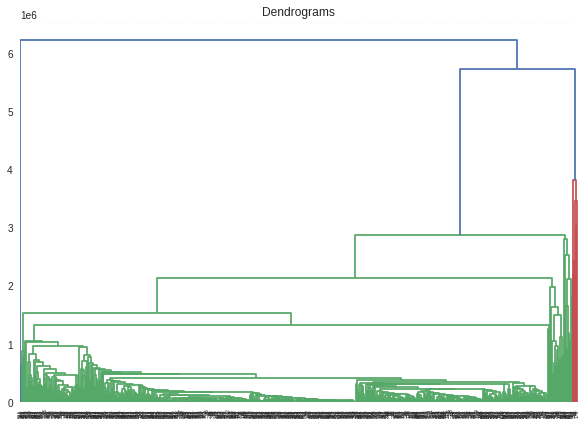

In [55]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dataf.iloc[:,1:], method='average'))
# plt.axhline(y=6, color='r', linestyle='--')
plt.show()

#### Distance matrix used is s_distance

In [70]:
data_sdistance = pd.read_excel('data/data_sdistance.xlsx',engine='openpyxl')

data_sdistance.head()

,ID,17RA,1A1T,1A3M,1A51,1A60,1AFX,1AJF,1AJT,1AL5,1AM0,1ATO,1B36,1BAU,1BGZ,1BMV,1BN0,1BVJ,1C0A,1C0O,1D0T,1D4R,1DFU,1DUH,1DZ5,1E8S,1E95,1EBQ,1EC6,1EHT,1EHZ,1EI2,1ELH,1EMI,1ESY,1ET4,1EZK,1F27,1F6U,1F9L,...,6UQ3,6V9D,6VA1,6VAR,6VMY,6VRD,6VU1,6VVJ,6VZC,6W3M,6WBR,6WJR,6WYB,6X5M,6XB7,6XUS,6XWW,6XXA,6YL5,6YMK,6YYM,6ZLC,6hak,7A3Y,7A9W,7D12,7D81,7DD4,7EAG,7JJU,7JNH,7K16,7K98,7KGA,7KJT,7KJU,7LVA,7LYF,7MKY,7OAX
0,17RA,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1A1T,0.342,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1A3M,1.268,1.360,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1A51,1.906,NaN,5.944,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1A60,2.548,1.544,3.256,9.743,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
#normalize data
from sklearn.preprocessing import normalize
X = data_sdistance.iloc[:,1:].to_numpy()
X = np.nan_to_num(X)
X = X + X.T - np.diag(np.diag(X))
X
data_scaled = normalize(X)

In [80]:
#convert the full matrix numpy array to a full fledged dataframe
dataf = pd.DataFrame(data_scaled,columns=[data_sdistance.columns[1:]])
dataf.insert(0,'ID',data_sdistance.columns[1:])

In [81]:
dataf.head()

,ID,17RA,1A1T,1A3M,1A51,1A60,1AFX,1AJF,1AJT,1AL5,1AM0,1ATO,1B36,1BAU,1BGZ,1BMV,1BN0,1BVJ,1C0A,1C0O,1D0T,1D4R,1DFU,1DUH,1DZ5,1E8S,1E95,1EBQ,1EC6,1EHT,1EHZ,1EI2,1ELH,1EMI,1ESY,1ET4,1EZK,1F27,1F6U,1F9L,...,6UQ3,6V9D,6VA1,6VAR,6VMY,6VRD,6VU1,6VVJ,6VZC,6W3M,6WBR,6WJR,6WYB,6X5M,6XB7,6XUS,6XWW,6XXA,6YL5,6YMK,6YYM,6ZLC,6hak,7A3Y,7A9W,7D12,7D81,7DD4,7EAG,7JJU,7JNH,7K16,7K98,7KGA,7KJT,7KJU,7LVA,7LYF,7MKY,7OAX
0,17RA,0.000000,9.394781e-07,0.000003,0.000005,0.000007,0.000005,0.000001,0.000015,0.000010,0.000004,7.526813e-07,3.829335e-06,0.000002,0.000002,0.0,1.150998e-06,9.614542e-07,0.030989,0.000003,1.016394e-06,0.000004,0.000003,1.643537e-05,0.000006,0.0,0.000004,0.000000,0.000003,3.027207e-06,0.000006,0.000001,0.000006,0.0,1.280108e-06,0.000011,0.0,0.000004,1.197697e-06,8.103685e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1A1T,0.000001,0.000000e+00,0.000004,0.000000,0.000005,0.000003,0.000001,0.000010,0.000008,0.000003,7.109649e-07,5.157508e-06,0.000002,0.000001,0.0,6.446885e-07,9.158192e-07,0.030233,0.000002,7.260277e-07,0.000006,0.000002,1.906651e-05,0.000010,0.0,0.000005,0.000003,0.000002,0.000000e+00,0.000006,0.000001,0.000004,0.0,6.567388e-07,0.000007,0.0,0.000003,6.356508e-07,1.518332e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1A3M,0.000008,8.529109e-06,0.000000,0.000037,0.000020,0.000011,0.000009,0.000012,0.000005,0.000015,6.102076e-06,3.232908e-05,0.000024,0.000010,0.0,8.529109e-06,9.670504e-06,0.026154,0.000008,9.438462e-06,0.000016,0.000006,4.652127e-05,0.000032,0.0,0.000023,0.000011,0.000020,1.620531e-05,0.000032,0.000000,0.000003,0.0,6.434460e-06,0.000062,0.0,0.000025,8.579280e-06,1.417964e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1A51,0.000002,0.000000e+00,0.000006,0.000000,0.000010,0.000000,0.000003,0.000023,0.000011,0.000005,0.000000e+00,4.567065e-07,0.000004,0.000001,0.0,1.434163e-06,1.684040e-06,0.018122,0.000007,2.134447e-06,0.000002,0.000002,5.889939e-07,0.000010,0.0,0.000003,0.000001,0.000007,6.855847e-07,0.000005,0.000001,0.000016,0.0,2.810582e-06,0.000022,0.0,0.000010,3.145500e-06,1.156990e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1A60,0.000013,8.115218e-06,0.000017,0.000051,0.000000,0.000007,0.000004,0.000036,0.000020,0.000011,1.247767e-05,5.727431e-05,0.000009,0.000008,0.0,4.982660e-06,7.721021e-06,0.039116,0.000006,8.372761e-06,0.000063,0.000030,1.990331e-04,0.000082,0.0,0.000000,0.000012,0.000005,2.436668e-05,0.000007,0.000011,0.000026,0.0,6.349212e-06,0.000011,0.0,0.000011,5.529281e-06,1.175235e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


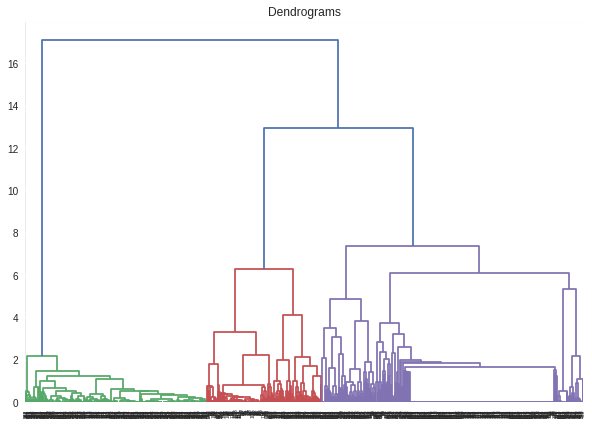

In [92]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dataf.iloc[:,1:], method='ward'))
# plt.axhline(y=6, color='r', linestyle='--')
plt.show()

In [ ]:
#so visualization is done fine
#but we have to decide the clusters based on distance threhsold, so have to read the paper and decide accoridngly...

In [78]:
clustering = AgglomerativeClustering(n_clusters=None,affinity='precomputed',distance_threshold=1.0,linkage='average')
clustering.fit_predict(dataf.iloc[:,1:].to_numpy())

array([ 4, 26,  0, 26, 16, 26,  4,  4,  4,  4, 26,  0,  4,  4,  4,  4, 16,
       17,  4,  4,  4,  4,  4,  4,  0, 16,  4,  4,  4,  4, 26,  4, 26,  0,
        4,  4,  4,  4,  4,  4, 30, 31, 26,  4,  4,  4, 16,  4,  4,  4,  9,
        4, 26,  0, 21, 10,  4,  4, 28,  4,  4,  4,  4,  4,  4, 29,  4, 19,
       22,  4,  4, 29,  0,  0,  0,  4,  4,  4,  4,  4, 16, 30, 31, 17,  4,
        4,  4,  4,  0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 21,  4,  0,
       16,  4, 16,  4,  4,  4,  4, 23, 16,  4, 30,  4,  4, 13,  1,  4,  4,
        4,  4,  4, 26,  4, 26,  4,  4,  4, 26,  4,  4,  4,  4,  9,  4, 26,
        0, 10,  4,  4, 28,  4,  4,  4,  4,  4,  4,  4, 19, 22,  4, 29,  0,
        0,  0,  4,  4,  4,  4,  4, 30, 31, 17,  4,  4,  4,  4,  0,  4,  4,
        4,  4,  4,  4,  4,  4,  4, 21,  4,  0, 16,  4, 16,  4,  4,  4,  4,
       23, 16,  4, 30,  4,  4, 13,  1,  4,  4,  4,  4,  4,  0,  0,  0, 26,
        4, 26,  4,  4,  4, 26,  4,  4,  4,  4,  9,  4, 26,  0, 10,  4,  4,
       28,  4,  4,  4,  4

In [15]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

Dist_matrix = np.array([[0,0.2,0.3,0.7],[0.2,0,0.7,0.8],[0.3,0.7,0,0.3],[0.7,0.8,0.3,0]])
clustering = AgglomerativeClustering(n_clusters=None,affinity='precomputed',distance_threshold=0.5,linkage='average')
clustering.fit_predict(Dist_matrix)

array([1, 1, 0, 0])

In [67]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import math
X = np.array([[0,1,2,2], [1, 0,-100,-100], [2, -100,0,5],[2, -100,5,0]])
clustering = AgglomerativeClustering().fit(X)



In [70]:
AgglomerativeClustering()
clustering.labels_


array([0, 0, 0, 1, 0, 0])

In [71]:
clustering = AgglomerativeClustering(n_clusters=None,affinity='precomputed',distance_threshold=1.0,linkage='average')
X = np.array([[0,1,2,2], [1, 0,-100,-100], [2, -100,0,5],[2, -100,5,0]])
clustering.fit_predict(X)

array([1, 0, 0, 0])